# Trabalho 2
Descrição do trabalho:

https://web.tecgraf.puc-rio.br/~mgattass/visao/trb/T2.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [382]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

### Função

y = np.sin(np.pi\*x) - x\*\*3

In [480]:
num_points = 101

In [481]:
x = np.linspace( -1, 1, num_points )
y = np.sin( np.pi * x) - x**3

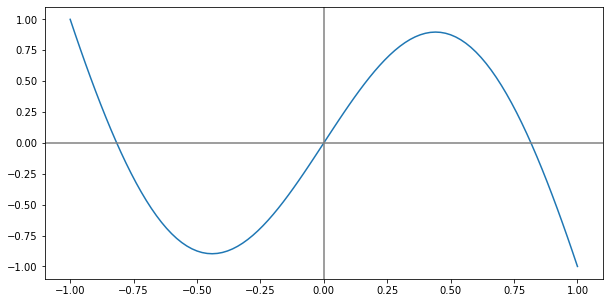

In [482]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

### Solução por Mínimos Quadrados

In [214]:
# sxy = sx = sy = sx2 = 0
# n = x_.shape[0]

# for i in range(n):

#     sxy += x_[i] * y_[i]
#     sx += x_[i]
#     sy += y_[i]
#     sx2 += x_[i]**2

# a_ls = ( n * sxy - sx * sy ) / ( n * sx2 - sx * sx )
# b_ls = ( sy * sx2 - sx * sxy ) / ( n * sx2 - sx * sx )

In [184]:
# print( f'=== a ===' )
# print( f'ls = {a_ls:.3f}' )
# print( f'gd = {a0_gd:.3f}' )
# print()

# print( f'=== b ===' )
# print( f'ls = {b_ls:.3f}' )
# print( f'gd = {b0_gd:.3f}' )

In [ ]:
# # Somatório das distâncias d = y - y_pred
# for i in range( len(x) ):

#     y_pred_i = np.sin( np.pi * x[i]) - x[i]**3
#     np.power( ( y[i] - y_pred_i ) , 2)

In [ ]:
# x_ = np.array( [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] )
# y_ = np.array( [0.4, 0.7, 1.9, 2.0, 3.2, 4.5] )

In [ ]:
# fig = plt.figure( figsize=( 4, 4 ) )
# plt.scatter( x_, y_ )
# plt.show()

In [ ]:
# a = np.arange( -2, 3, 0.1 )
# b = np.arange( -2, 3, 0.1 )
# aa, bb = np.meshgrid( a, b, sparse = True)

In [ ]:
# a

In [ ]:
# b

In [ ]:
# err = calcula_erro( aa, bb )

In [37]:
# z = np.power( err, 0.2 )
# n_levels = 15

In [ ]:
# h = plt.contourf( a, b, z, n_levels )
# plt.axis( 'scaled' )
# plt.colorbar()
# plt.show()

### Gradiente Descendente

In [494]:
def calcula_erro( a, b, c, d ):

    soma = 0.0
    n = x.shape[0]
    for i in range(n):

        e = y[i] - ( a + b*x[i] + c*(x[i]**2) + d*(x[i]**3) )
        soma += e * e

    return soma/n
    # return soma

In [527]:
def calcula_derivada_a( a, b, c, d ):

    soma = 0.0
    for i in range( x.shape[0] ):

        soma += y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3)

    return -2 * soma

In [528]:
def calcula_derivada_b( a, b, c, d ):

    soma = 0.0
    for i in range( x.shape[0] ):

        soma += x[i] * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -2 * soma

In [529]:
def calcula_derivada_c( a, b, c, d ):

    soma = 0.0
    for i in range( x.shape[0] ):

        soma += x[i] * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -4 * soma

In [530]:
def calcula_derivada_d( a, b, c, d ):

    soma = 0.0
    for i in range( x.shape[0] ):

        soma += (x[i]**2) * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))
        # soma += x[i] * (y[i] - a - b*x[i] - c*(x[i]**2) - d*(x[i]**3))

    return -6 * soma

In [531]:
# a = np.random.rand()
# b = np.random.rand()
# c = np.random.rand()
# d = np.random.rand()

a = 0.0
b = 0.0
c = 0.0
d = 0.0

print( f'a: {a}' )
print( f'b: {b}' )
print( f'c: {c}' )
print( f'd: {d}' )

a: 0.0
b: 0.0
c: 0.0
d: 0.0


In [532]:
err = calcula_erro( a, b, c, d )
err

0.39966850017257133

In [542]:
def grad_desc( a0, b0, c0, d0, tol, max_it, learning_rate ):

    erro0 = calcula_erro( a0, b0, c0, d0 )
    erros = [erro0]
    
    for it in range( max_it ):

        derivada_a = calcula_derivada_a( a0, b0, c0, d0 )
        derivada_b = calcula_derivada_b( a0, b0, c0, d0 )
        derivada_c = calcula_derivada_c( a0, b0, c0, d0 )
        derivada_d = calcula_derivada_d( a0, b0, c0, d0 )

        a1 = a0 - learning_rate * derivada_a
        b1 = b0 - learning_rate * derivada_b
        c1 = c0 - learning_rate * derivada_c
        d1 = d0 - learning_rate * derivada_d

        print( f'a0: {a0:.3f}' )
        print( f'a1: {a1:.3f}' )
        print()

        erro1 = calcula_erro( a1, b1, c1, d1 )
        erros.append( erro1 )

        tol_erro = abs(erro1 - erro0) < tol
        tol_a = abs(a1 - a0) < tol
        tol_b = abs(b1 - b0) < tol
        tol_c = abs(c1 - c0) < tol
        tol_d = abs(d1 - d0) < tol
        if tol_erro and tol_a and tol_b and tol_c and tol_d:

            print( f'Convergiu na iteração {it}' )
            print( f'Erro atual = {erro1:.3f}' )
            print( f'Delta erro = {erro1 - erro0}' )
            break
        
        a0 = a1
        b0 = b1
        c0 = c1
        d0 = d1
        erro0 = erro1

    print( f'Solução a = {a1:.3f}' )
    print( f'Solução b = {b1:.3f}' )
    print( f'Solução c = {c1:.3f}' )
    print( f'Solução d = {d1:.3f}' )

    return a0, b0, c0, d0, np.array(erros)

a0: 0.000
a1: -0.000

a0: -0.000
a1: -0.003

a0: -0.003
a1: -0.008

a0: -0.008
a1: -0.015

a0: -0.015
a1: -0.023

a0: -0.023
a1: -0.031

a0: -0.031
a1: -0.041

a0: -0.041
a1: -0.050

a0: -0.050
a1: -0.060

a0: -0.060
a1: -0.070

a0: -0.070
a1: -0.081

a0: -0.081
a1: -0.091

a0: -0.091
a1: -0.102

a0: -0.102
a1: -0.113

a0: -0.113
a1: -0.124

a0: -0.124
a1: -0.135

a0: -0.135
a1: -0.146

a0: -0.146
a1: -0.158

a0: -0.158
a1: -0.169

a0: -0.169
a1: -0.182

a0: -0.182
a1: -0.194

a0: -0.194
a1: -0.207

a0: -0.207
a1: -0.220

a0: -0.220
a1: -0.234

a0: -0.234
a1: -0.248

a0: -0.248
a1: -0.262

a0: -0.262
a1: -0.277

a0: -0.277
a1: -0.293

a0: -0.293
a1: -0.309

a0: -0.309
a1: -0.326

a0: -0.326
a1: -0.344

a0: -0.344
a1: -0.363

a0: -0.363
a1: -0.382

a0: -0.382
a1: -0.402

a0: -0.402
a1: -0.423

a0: -0.423
a1: -0.445

a0: -0.445
a1: -0.468

a0: -0.468
a1: -0.492

a0: -0.492
a1: -0.517

a0: -0.517
a1: -0.544

a0: -0.544
a1: -0.572

a0: -0.572
a1: -0.600

a0: -0.600
a1: -0.631

a0: -0.631
a

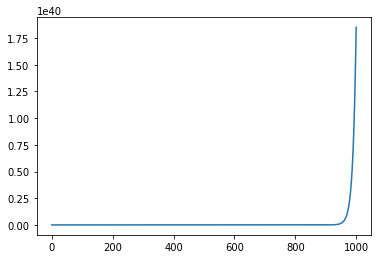

CPU times: user 2.31 s, sys: 170 ms, total: 2.48 s
Wall time: 2.29 s


In [544]:
%%time

a_gd, b_gd, c_gd, d_gd, erros = grad_desc(a0 = a,
                                          b0 = b, 
                                          c0 = c, 
                                          d0 = d, 
                                          tol = 1e-5, 
                                          max_it = 1000, 
                                          learning_rate = 0.001)

interacao = np.linspace( 0, erros.shape[0] - 1, erros.shape[0] )
plt.plot( interacao, erros )
plt.show()


Função aproximada: -85365900193970749440.000 + 156377097426090164224.000 x + 312754194852180328448.000 x^2 + -440190982403909550080.000 x^3



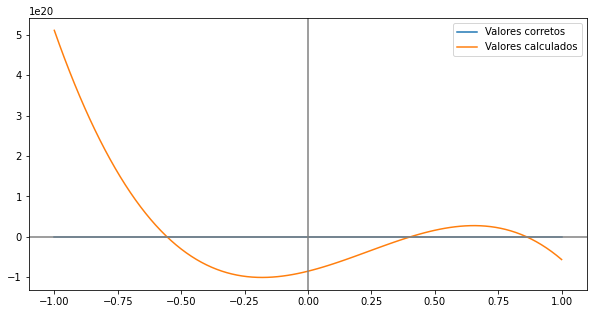

In [545]:
y_novo = a_gd + b_gd * x + c_gd * (x**2) + d_gd * x**3

print()
print( f'Função aproximada: {a_gd:.3f} + {b_gd:.3f} x + {c_gd:.3f} x^2 + {d_gd:.3f} x^3' )
print()

plt.figure( figsize=(10, 5) )
plt.plot( x, y, label='Valores corretos' )
plt.plot( x, y_novo, label='Valores calculados' )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.legend()
plt.show()

In [466]:
# y_novo = a_gd + b_gd*x + c_gd*(x**2) + d_gd*(x**3)

In [477]:
# plt.figure( figsize = ( 10, 5 ) )
# plt.plot( x, y_novo )
# plt.axhline( 0, color='gray')
# plt.axvline( 0, color='gray')
# plt.show()

In [254]:
# h = plt.contourf( a, b, z, n_levels )

# plt.axis( 'scaled' )
# plt.plot( caminho[:, 0], caminho[:, 1], 'r' )
# plt.colorbar()
# plt.show()

### Pytorch (autograd)

In [473]:
x = torch.linspace( -1, 1, num_points, dtype=torch.float )
y = torch.sin( np.pi * x) - x**3

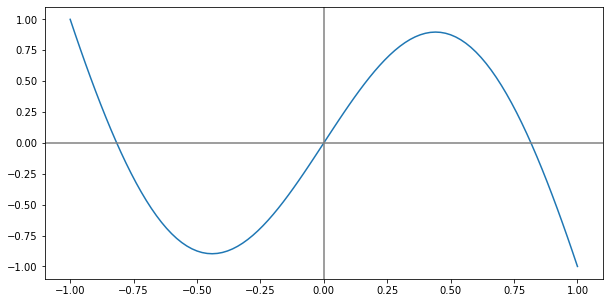

In [474]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

a (inicial): 0.000
b (inicial): 0.000
c (inicial): 0.000
d (inicial): 0.000

Solução a = -0.000
Solução b = 2.677
Solução c = 0.000
Solução d = -3.861


Função aproximada: -0.000 + 2.677 x + 0.000 x^2 + -3.861 x^3



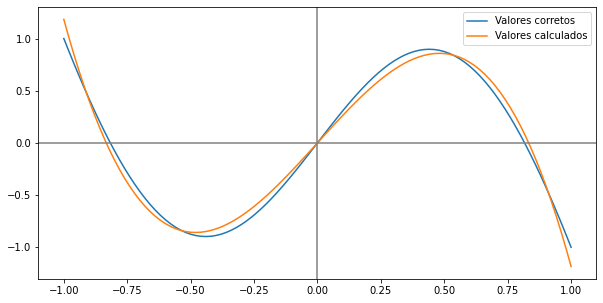

CPU times: user 2.91 s, sys: 125 ms, total: 3.03 s
Wall time: 2.97 s


In [478]:
%%time

learning_rate = 0.001
iteracoes = 10000

# a = torch.rand( (), dtype=torch.float, requires_grad=True )
# b = torch.rand( (), dtype=torch.float, requires_grad=True )
# c = torch.rand( (), dtype=torch.float, requires_grad=True )
# d = torch.rand( (), dtype=torch.float, requires_grad=True )

a = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
c = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
d = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

print( f'a (inicial): {a:.3f}' )
print( f'b (inicial): {b:.3f}' )
print( f'c (inicial): {c:.3f}' )
print( f'd (inicial): {d:.3f}' )

def forward(x):
    return a + b*x + c*(x**2) + d*(x**3)

def loss(y, y_pred):
    return (y - y_pred).pow(2).sum()
    # return (y - y_pred).pow(2).sum() / len(y)

for iteracao in range(0, iteracoes):

    y_pred = forward(x)

    l = loss(y, y_pred)
    
    # Calcular os gradientes de forma automática usando o PyTorch (autograd)
    l.backward()

    with torch.no_grad():

        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()

    # if iteracao % 20 == 0:
    #     print(f'iteracao {iteracao}')
    #     print(f'loss = {l.item():.8f}')
    #     print()
    #     print(f'a = {a.item():.3f}')
    #     print(f'b = {b.item():.3f}')
    #     print(f'c = {c.item():.3f}')
    #     print(f'd = {d.item():.3f}')
    #     print()
    #     print( '------------------------------' )
    #     print()

print()
print( f'Solução a = {a.item():.3f}' )
print( f'Solução b = {b.item():.3f}' )
print( f'Solução c = {c.item():.3f}' )
print( f'Solução d = {d.item():.3f}' )
print()

y_novo = a.item() + b.item() * x + c.item() * (x**2) + d.item() * x**3

print()
print( f'Função aproximada: {a.item():.3f} + {b.item():.3f} x + {c.item():.3f} x^2 + {d.item():.3f} x^3' )
print()

plt.figure( figsize=(10, 5) )
plt.plot( x, y, label='Valores corretos' )
plt.plot( x, y_novo, label='Valores calculados' )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.legend()
plt.show()